In [1]:
!pip install tensorflow --quiet

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
y_test[0]

np.uint8(7)

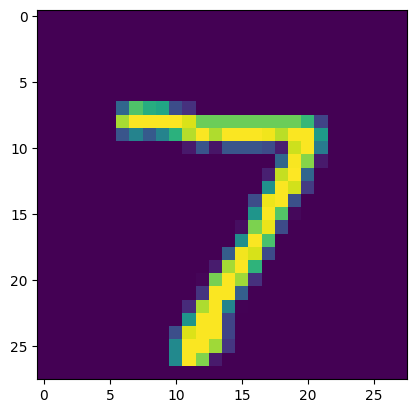

In [5]:
plt.imshow(x_test[0])

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8737 - loss: 0.4439
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9639 - loss: 0.1214
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9767 - loss: 0.0794
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9810 - loss: 0.0596
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9874 - loss: 0.0411
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9899 - loss: 0.0339


In [12]:
test_loss, test_accuracy  = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0808
Test accuracy: 97.88%


In [13]:
predictions = model.predict(x_test)
print(predictions)
print(predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[5.98167738e-09 3.86950437e-11 2.11832185e-06 ... 9.99837637e-01
  9.47989776e-08 1.89706029e-07]
 [9.53951029e-10 1.05218867e-04 9.99828100e-01 ... 3.46500687e-13
  9.56578788e-07 1.07908304e-13]
 [1.35499567e-06 9.97752547e-01 1.13617469e-04 ... 6.63781480e-04
  1.35019328e-03 1.69877069e-06]
 ...
 [2.54342473e-13 4.07764988e-10 2.60405586e-11 ... 9.13525037e-06
  3.89761510e-07 1.10805195e-06]
 [4.90558794e-09 2.98604501e-12 2.18940296e-10 ... 5.08825559e-09
  1.71146681e-07 2.89715647e-12]
 [3.05117043e-10 2.21600429e-12 4.74261519e-09 ... 1.60573272e-14
  3.35489220e-10 1.33920479e-12]]
(10000, 10)


In [14]:
predictions[0]

array([5.9816774e-09, 3.8695044e-11, 2.1183218e-06, 1.5969361e-04,
       1.8061385e-13, 2.4226293e-07, 2.3847682e-12, 9.9983764e-01,
       9.4798978e-08, 1.8970603e-07], dtype=float32)

In [15]:
print(np.argmax(predictions[0]))

7


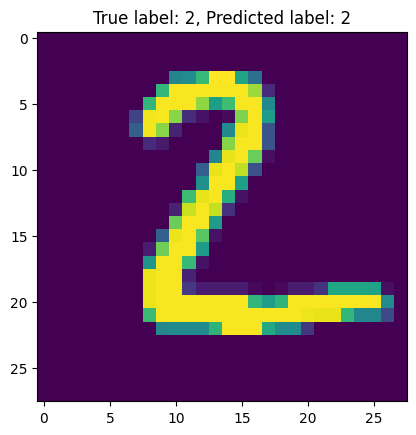

In [16]:
plt.imshow(x_test[1])
plt.title(f"True label: {y_test[1]}, Predicted label: {np.argmax(predictions[1])}")
plt.show()

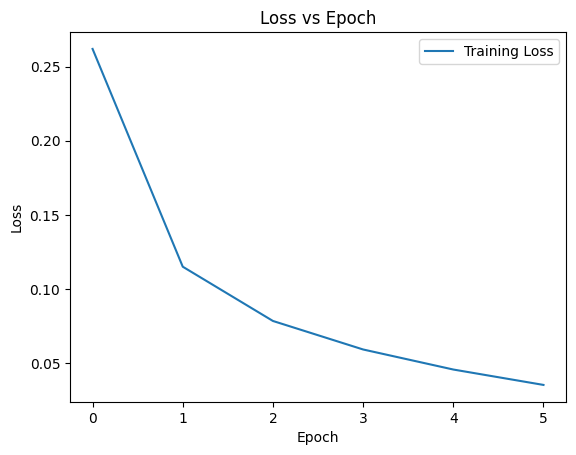

In [17]:
plt.plot(history.history['loss'], label="Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epoch')
plt.show()

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)